<a href="https://colab.research.google.com/github/truongthuanr/self-learning-project/blob/main/05_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information


**Data:** 
* Kaggle: [Amazon Fine Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)

**Problem:**
* To determine whether a review is positive or negative

**Reference:**
* [A Beginner’s Guide to Sentiment Analysis](https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6)
* [A Complete Step by Step Tutorial on Sentiment Analysis in Keras and Tensorflow](https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f)
* [A Step-by-Step Tutorial for Conducting Sentiment Analysis](https://towardsdatascience.com/a-step-by-step-tutorial-for-conducting-sentiment-analysis-a7190a444366)

# Import data

In [1]:
import pandas as pd

In [67]:
df_org = pd.read_csv("/content/drive/MyDrive/01_Personal/01_Study/01_ML/03_FoodReviews/Dataset/Reviews.csv")

In [30]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [3]:
df_org.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Analysis 

In [32]:
# Import Plotly library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Check null data

In [17]:
df_org.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [68]:
df_org[df_org.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 25509 to 560446
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      43 non-null     int64 
 1   ProductId               43 non-null     object
 2   UserId                  43 non-null     object
 3   ProfileName             27 non-null     object
 4   HelpfulnessNumerator    43 non-null     int64 
 5   HelpfulnessDenominator  43 non-null     int64 
 6   Score                   43 non-null     int64 
 7   Time                    43 non-null     int64 
 8   Summary                 16 non-null     object
 9   Text                    43 non-null     object
dtypes: int64(5), object(5)
memory usage: 3.7+ KB


There are 43 row contain na data, very small than total 568454 row. -> Delete row have NA data

In [37]:
df_org.dropna(axis=0, inplace=True)

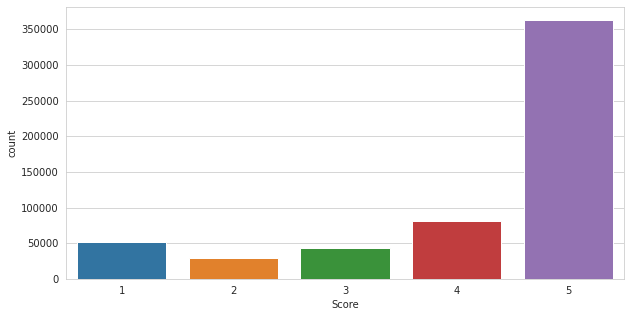

In [38]:
# Check product score
fig = plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(x=df["Score"])

Almost review is scored by 5 -> most customer rating positive.

Get 10% data for analyze to optimize time

In [73]:
num = round(len(df)*0.1)
df = df_org.sample(frac=1, random_state=40)[:num]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56845 entries, 33854 to 43005
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      56845 non-null  int64 
 1   ProductId               56845 non-null  object
 2   UserId                  56845 non-null  object
 3   ProfileName             56844 non-null  object
 4   HelpfulnessNumerator    56845 non-null  int64 
 5   HelpfulnessDenominator  56845 non-null  int64 
 6   Score                   56845 non-null  int64 
 7   Time                    56845 non-null  int64 
 8   Summary                 56843 non-null  object
 9   Text                    56845 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.8+ MB


Check the most frequently used word in the reviews...

In [75]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [76]:
# Create stopwords list
vocab = "".join(review for review in df.Text)
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
wordclouds = WordCloud(stopwords=stopwords).generate(vocab)

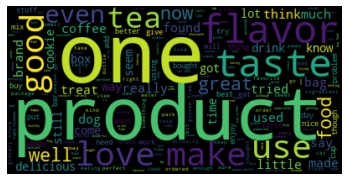

In [77]:
plt.imshow(wordclouds, interpolation='bilinear')
plt.axis("off")
plt.show()